## Иерархическая агломеративная кластеризация клиентов


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 


## Разведовательный анализ данных

In [3]:
df = pd.read_csv('/Users/olgahromova/Desktop/УчЕБА/МИСиС СпецГлМатематики/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


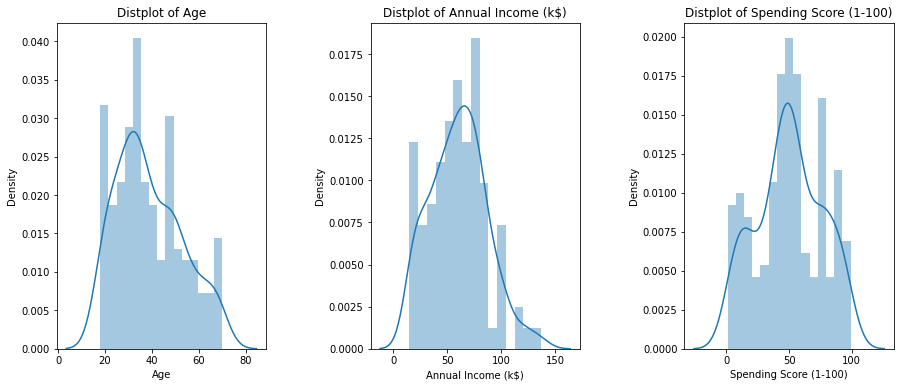

In [6]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

В данных нет пропущенных значений. признаки распрежедены нормально. 
Также по каждому признаку отсутвуют выбросы значнеий, максималные значения по каждому признаку правдоподобны и не отклоняются от среднего больше, чем на величину трех среднеквадратическтх отклонений.

## Кодирование признаков
В данных присутвует категориальный признак. Для применения алгоритма кластеризации и последующей визулизации закодируем признак занчениями 1, 0.


In [7]:
label_encoder = preprocessing.LabelEncoder() 

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## Дендограмма

По мере объединения кластеров, каждой итерации алгоритма соответствует пара объединяемых на этой итерации кластеров, а также расстояние между кластерами в момент слияния. Расстояния с ростом итерации будут только увеличиваться, поэтому возникает возможность построить следующую схему, называемую дендрограммой

In [11]:
sch.linkage(df, method  = "ward")

array([[4.80000000e+01, 4.90000000e+01, 2.23606798e+00, 2.00000000e+00],
       [1.29000000e+02, 1.31000000e+02, 2.23606798e+00, 2.00000000e+00],
       [1.14000000e+02, 1.15000000e+02, 2.44948974e+00, 2.00000000e+00],
       [3.00000000e+00, 5.00000000e+00, 2.64575131e+00, 2.00000000e+00],
       [6.50000000e+01, 6.80000000e+01, 3.16227766e+00, 2.00000000e+00],
       [1.30000000e+01, 1.50000000e+01, 3.60555128e+00, 2.00000000e+00],
       [8.30000000e+01, 8.50000000e+01, 3.60555128e+00, 2.00000000e+00],
       [1.17000000e+02, 1.19000000e+02, 3.60555128e+00, 2.00000000e+00],
       [1.56000000e+02, 1.58000000e+02, 3.60555128e+00, 2.00000000e+00],
       [1.06000000e+02, 1.09000000e+02, 3.74165739e+00, 2.00000000e+00],
       [1.50000000e+02, 1.52000000e+02, 3.87298335e+00, 2.00000000e+00],
       [1.37000000e+02, 1.39000000e+02, 4.00000000e+00, 2.00000000e+00],
       [9.50000000e+01, 9.70000000e+01, 4.24264069e+00, 2.00000000e+00],
       [1.13000000e+02, 2.02000000e+02, 4.24264069e

In [12]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


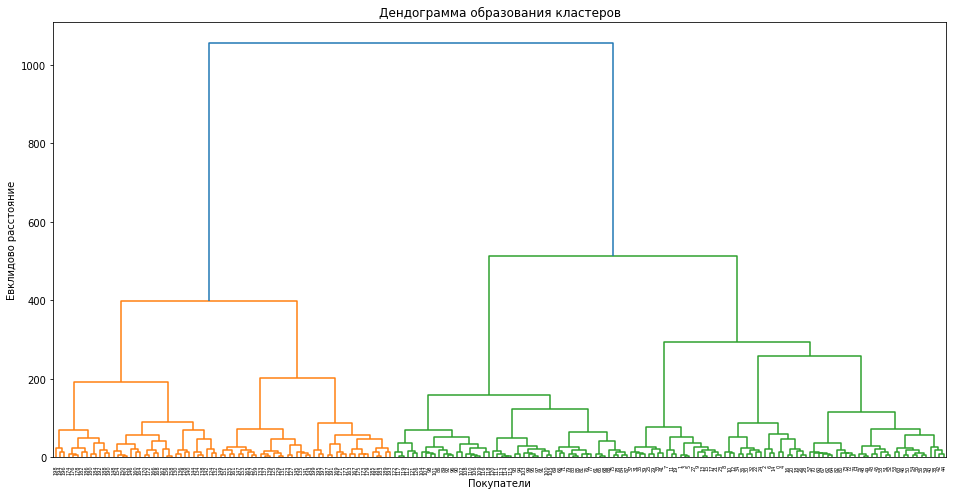

In [13]:
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(df, method  = "ward"))

plt.title('Дендограмма образования кластеров')
plt.xlabel('Покупатели')
plt.ylabel('Евклидово расстояние')
plt.show()

## Проверка качества кластеризации по дендограмме

По вертикали откладывается расстояние  между кластерами, а по горизонтали – исходные данные (объекты). Глядя на этот график, мы сразу видим, в каком порядке происходило объединение данных в группы и насколько сильно кластеры отделены друг от друга по минимальному расстоянию.

Хороший алгоритм иерархической кластеризации должен давать дендограмму без внутренних пересечений и с ярко выраженными минимальными отступами между формируемыми кластерами. Дендограмма на рисунке соответствует этим критериям. Конечно, при выборе других метрик и способов вычисления расстояний между кластерами, дендограмма будет меняться. 

## Агломеративная кластеризация

Подход к кластеризации "снизу-вверх". каждому налюдению присваивается свой кластер, поэтапно наблюдения объединяются в более обикные кластеры, пока в итоге не получится один кластер, содержащий все наблюдения.

In [16]:
def clustering(df):
    hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='average')
    y_hc = hc.fit_predict(df)
    return y_hc
y_hc = clustering(df)

In [17]:
df['cluster'] = pd.DataFrame(y_hc)

In [18]:
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['cluster'], 
        size= 10,
        line=dict(
            color= df['cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Кластеры покупателей',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

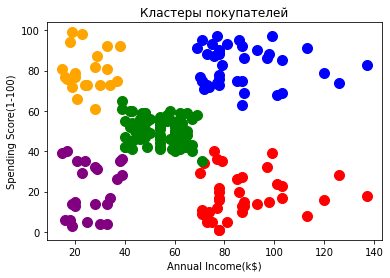

In [19]:
X = df.iloc[:, [3,4]].values
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='purple', label ='Cluster 4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='orange', label ='Cluster 5')
plt.title('Кластеры покупателей')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

## Кластеры

1. Green - низкий уровень дохода, низкий уровень трат
2. Yellow - низкий уровень дохода,высокий кровень трат
3. Red - средний уровень дохода, средний уровень трат
4. Purple - высокий уровень дохода, низкий уровень трат
5. Blue - высокий уровень дохода, высокий уровень трат

In [20]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,3
1,2,1,21,15,81,4
2,3,0,20,16,6,3
3,4,0,23,16,77,4
4,5,0,31,17,40,3


In [21]:
df.cluster.value_counts()

2    80
1    39
0    37
3    23
4    21
Name: cluster, dtype: int64

Наиболее многочисленный класс - желтый. Это люди с низки уровнем дохода и высоким уровнем трат.

In [22]:
df.to_csv("segmented_customers.csv", index = False)